# Comprehensive Data Analysis with PySpark

# Introduction

In this notebook, we will be exploring the powerful capabilities of PySpark. PySpark is the Python library for Apache Spark, an open-source, distributed computing system used for big data processing and analytics.

We will be using Google Colab for our work. While not strictly necessary for PySpark, Google Colab provides several advantages. It offers a convenient, cloud-based environment for using PySpark, providing free access to computational resources like CPUs and GPUs

Our journey will take us through the process of installing PySpark, loading and cleaning data, performing some exploratory data analysis, and finally, drawing some conclusions from our data. We hope this notebook serves as a useful guide for your own data processing and analysis tasks with PySpark.

# Table of Contents
1. [Introduction](#Introduction)
2. [Exploratory Data Analysis (EDA) on the First Dataset](#eda-first-dataset)
3. [Query the data](#eda-first-dataset)
4. [EDA on another dataset, query & visulization](#eda-second-dataset)
5. [Join the two datasets, query & visualization](#eda-joined-dataset)


### Let's mount the google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing pyspark module



In [5]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=dd1de1afd7d9f548da270c39aa512b05be26c35be9bac9ff1ae5dacdd4f47892
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


Importing the modules

In [6]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, when, struct
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Creating spark session

In [7]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 1 : EDA on the First Dataset <a id='eda-first-dataset'></a>
importing the *Listenings.csv* file:

In [8]:
listening_df = spark.read.csv('/content/drive/MyDrive/dataset/listenings.csv', inferSchema=True, header=True) # direct read approach

# Format & options appraoch
# listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load('/content/drive/MyDrive/dataset/listenings.csv')

let's check the data:

In [9]:
listening_df.show(10)

+-----------+-------------+--------------------+------------+--------------------+
|    user_id|         date|               track|      artist|               album|
+-----------+-------------+--------------------+------------+--------------------+
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|       Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|   Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000

let's see the shape of our dataframe before cleaning

In [10]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(14650594, 5)


In [11]:
# check the schema
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- date: long (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [12]:
# check if there are null values
listening_df.select([count(when(col(c).isNull(), c)).alias(c) for c in listening_df.columns]).show()

+-------+----+-----+------+------+
|user_id|date|track|artist| album|
+-------+----+-----+------+------+
|      0|   0|  230|   435|891137|
+-------+----+-----+------+------+



let's delete useless columns:

In [13]:
listening_df = listening_df.drop('date')

drop the null values:

In [14]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [15]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the shape of our dataframe after cleaning

In [16]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 2: Query the data <a id='query-data'></a>

**Query #0:**
select two columns: track and artist

In [17]:
q0 = listening_df.select('artist', 'track')
q0.show(truncate=False)

+---------------+--------------------------------------------+
|artist         |track                                       |
+---------------+--------------------------------------------+
|Jessie J       |Price Tag                                   |
|Jessie J       |Price Tag (Acoustic Version)                |
|Robyn          |Be Mine! (Ballad Version)                   |
|Kelis          |Acapella                                    |
|The Tease      |I'm Not Invisible                           |
|MSTRKRFT       |Bounce (Feat NORE + ISIS)                   |
|Rihanna        |Don't Stop The Music (Wideboys Bassline Mix)|
|Meshuggah      |ObZen                                       |
|Gojira         |Yama's Messengers                           |
|Napalm Death   |On the Brink of Extinction                  |
|Napalm Death   |On the Brink of Extinction                  |
|Napalm Death   |In Deference                                |
|Decapitated    |Post(?)organic                        

**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [18]:
q1 = listening_df.filter(col('artist') == 'Rihanna')
q1.show(truncate=False)

+-----------+--------------------------------------------+-------+-------------------------------+
|user_id    |track                                       |artist |album                          |
+-----------+--------------------------------------------+-------+-------------------------------+
|000Silenced|Don't Stop The Music (Wideboys Bassline Mix)|Rihanna|Addicted 2 Bassline CD1        |
|000Silenced|Disturbia                                   |Rihanna|Good Girl Gone Bad: The Remixes|
|00williamsl|Hatin On The Club                           |Rihanna|Random                         |
|00williamsl|Hatin On The Club                           |Rihanna|Random                         |
|00williamsl|Complicated                                 |Rihanna|Loud                           |
|00williamsl|What's My Name (feat Drake)                 |Rihanna|Loud                           |
|00williamsl|Kanye West feat Rihanna - All Of The Lights |Rihanna|Loud                           |
|0502008  

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [19]:
q2 = listening_df.select('user_id').filter(col('artist') == 'Rihanna') \
     .groupby('user_id').agg(count('user_id').alias('count')) \
     .orderBy(desc('count')).limit(10)

q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks

In [20]:
q3 = (listening_df
      .groupby('artist', 'track')
      .agg(count('*').alias('count'))
      .orderBy(desc('count'))
      .limit(10))

q3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [21]:
q4 = (listening_df
      .filter(col('artist') == 'Rihanna')
      .groupby('artist', 'track')
      .agg(count('*').alias('count'))
      .orderBy(desc('count'))
      .limit(10))

q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums

In [22]:
q5 = (listening_df
      .groupby('artist', 'album')
      .agg(count('*').alias('count'))
      .orderBy(col('count'))
      .limit(10))

q5.show()

+----------------+--------------------+-----+
|          artist|               album|count|
+----------------+--------------------+-----+
|   Henry Rollins|      Big Ugly Mouth|    1|
|           Baby!|         Mitch Ryder|    1|
|     Donna Fargo|         Shame On Me|    1|
|    Oscar D'León| Los Mejores Oscares|    1|
|             ak9|                DNCE|    1|
|  Cobra Starship|#1Nite (One Night...|    1|
|             DMX|     #MonsterMondays|    1|
|       The Whigs|Give 'em All a Bi...|    1|
|The Decemberists|Uncut 201502 Doin...|    1|
|     Jethro Tull|            Nightcap|    1|
+----------------+--------------------+-----+



# Task 3 : EDA on another dataset, query & visulization <a id='eda-second-dataset'></a>
importing the ***genre.csv*** file:

In [23]:
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load('/content/drive/MyDrive/dataset/genre.csv')

let's check the data

In [24]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



check the top 10 genres

In [25]:
top_genres = (genre_df.groupBy('genre')
              .agg(count('genre').alias('count'))
              .orderBy('count', ascending=False)
              .limit(10))
top_genres.show()

+----------+-----+
|     genre|count|
+----------+-----+
|      rock| 9066|
|       pop| 6960|
|electronic| 4410|
|      jazz| 4400|
|   hip hop| 4288|
|     house| 3310|
|      folk| 3217|
|     dance| 2894|
|      punk| 2661|
|soundtrack| 2360|
+----------+-----+



Visualize the top 10 genres

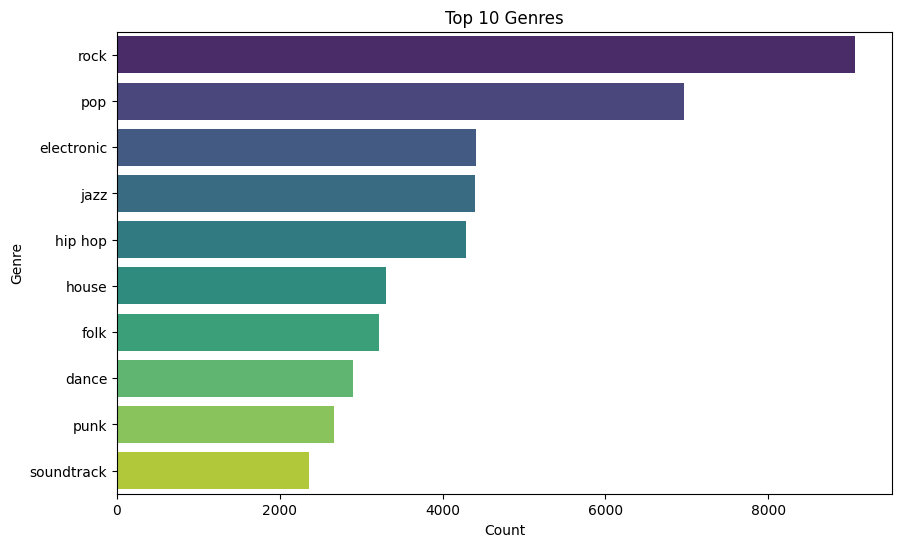

In [26]:
# Convert to Pandas DataFrame
top_genres_pd = top_genres.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='genre', data=top_genres_pd, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [27]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

Let's inner join these two data frames

In [28]:
# Remove all duplicate rows in the genre dataset
df_cleaned = genre_df.dropDuplicates()

# Join the two datasets
data = listening_df.join(df_cleaned, ['artist'], 'inner')
data.show()

# After joining the two datasets, we can see that there are some abnormal values in the genre column.
# After checkinh the orighinal dataset, we can find that the genre column contains some values that are not genres.
# This is because the source dataset is not clean, where the name of artists are also included in the genre column.
# Considering that the number of these abnormal values is large, futher cleaning is needed.

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [29]:
q6 = (data.filter(col('genre') == 'pop')
      .groupBy('user_id')
      .agg(count('*').alias('count'))
      .orderBy(desc('count'))
      .limit(10))

q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
|      blessbabe|  286|
|        DP_Sage|  274|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [30]:
q7 = (data.groupBy('genre')
      .agg(count('*').alias('count'))
      .orderBy(desc('count'))
      .limit(10))

q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2668250|
|       pop|1527984|
|   hip hop| 532360|
|electronic| 523615|
|      folk| 436123|
|indie rock| 431439|
|      punk| 380901|
|       r&b| 215782|
|     metal| 208107|
|     indie| 206703|
+----------+-------+



# Task 4: Join the two datasets, query & visualization <a id='eda-joined-dataset'></a>
**Query #8**

find out each user favourite genre

In [31]:
# To find out each user's favorite genre, we need to count the number of times each user listens to each genre first.
# Counting Genres per User
q8_1 = (data.groupBy('user_id', 'genre')
        .agg(count('*').alias('count'))
        .orderBy('user_id'))

q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph| Boston Pops Orch...|    1|
| --Seph|               Bjorn|    8|
| --Seph|                 pop|    9|
| --Seph| brazilian pop music|    1|
| --Seph|          Nils Frahm|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|               dance|    1|
| --Seph|        instrumental|    1|
| --Seph|  progressive trance|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               samba|    2|
| --Seph|               Ruben|    4|
| --Seph|             ambient|    6|
| --Seph|           classical|   28|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|               indie|    3|
| --Seph|             baroque|    1|
| --Seph|         heavy metal|    1|
| --Seph|     Hilko Schomerus|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [32]:
#Finding Most Frequent Genre per User
q8_2 = (q8_1.groupBy('user_id')
        .agg(max(struct(col('count'), col('genre'))).alias('max'))
        .select(col('user_id'), col('max.genre')))

q8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|       punk|
|        -Heiko-|        pop|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have and then visulize it using bar chart

In [33]:
q9 = (genre_df.select('genre')
      .filter(col('genre').isin('pop', 'rock', 'metal', 'hip hop'))
      .groupby('genre')
      .agg(count('genre').alias('count')))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [34]:
q9_list = q9.collect()

In [35]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [36]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

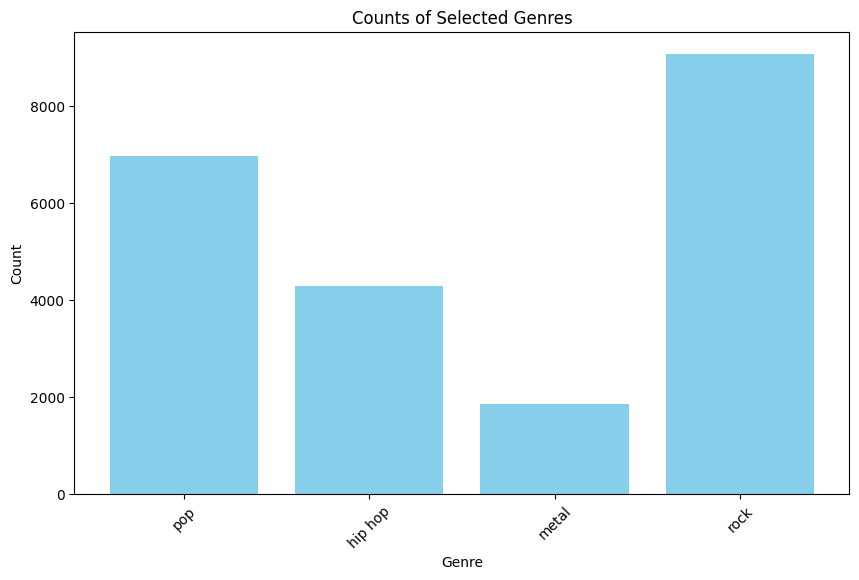

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Counts of Selected Genres')
plt.xticks(rotation=45)
plt.show()